In [113]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD




In [88]:
df = pdr.get_data_yahoo('spy')
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,261.550945,258.737871,260.213416,260.253796,9.107332e+07,248.683679
std,39.597295,39.059465,39.375755,39.315440,4.966230e+07,43.968700
min,184.100006,181.020004,182.339996,182.860001,2.027000e+07,166.733185
25%,226.584999,225.320000,226.154999,225.895004,5.870425e+07,210.139809
50%,267.040009,263.149994,265.359985,265.149994,7.722020e+07,253.695724
75%,289.965012,287.220001,289.104996,288.550003,1.051904e+08,280.341904
max,358.750000,353.429993,355.869995,357.700012,3.922207e+08,356.273865


In [89]:
df['dayOfWeek'] = df.index.dayofweek
df['numberOfDay'] = df.index.days_in_month
df['dayOfYear'] = df.index.dayofyear
print(df.head(10))


                  High         Low        Open       Close       Volume  \
Date                                                                      
2015-09-28  191.910004  187.639999  191.779999  188.009995  178515900.0   
2015-09-29  189.740005  186.929993  188.270004  188.119995  159045600.0   
2015-09-30  191.830002  189.440002  190.369995  191.630005  163452000.0   
2015-10-01  192.490005  189.820007  192.080002  192.130005  131079000.0   
2015-10-02  195.029999  189.119995  189.770004  195.000000  211003300.0   
2015-10-05  198.740005  196.330002  196.460007  198.470001  126320800.0   
2015-10-06  198.979996  197.000000  198.309998  197.789993  110274500.0   
2015-10-07  199.830002  197.479996  198.899994  199.410004  124307300.0   
2015-10-08  201.550003  198.589996  198.949997  201.210007  153055200.0   
2015-10-09  201.899994  200.580002  201.380005  201.330002  107069200.0   

             Adj Close  dayOfWeek  numberOfDay  dayOfYear  
Date                                   

In [90]:
N_DAY = 1
df['y'] = df['Close'].shift(N_DAY).pct_change(N_DAY)
print(df['y'].head(10))

Date
2015-09-28         NaN
2015-09-29         NaN
2015-09-30    0.000585
2015-10-01    0.018658
2015-10-02    0.002609
2015-10-05    0.014938
2015-10-06    0.017795
2015-10-07   -0.003426
2015-10-08    0.008191
2015-10-09    0.009027
Name: y, dtype: float64


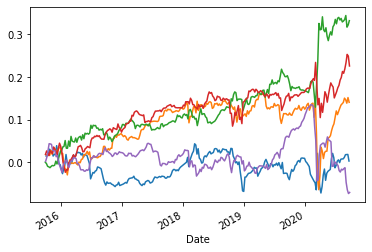

In [91]:
DAYS = [0,1,2,3,4]
for day in DAYS:
    result = df[df['dayOfWeek']==day]['y'].dropna().cumsum()
    result.plot(label = 'day' )

In [92]:
df.dropna().groupby(['dayOfWeek'], sort = False)[['y']].std()

,y
dayOfWeek,
2,0.011330
3,0.011195
4,0.011732
0,0.011820
1,0.013316


In [93]:
df['dayOfWeek'] = preprocessing.scale(df['dayOfWeek'])
df['dayOfYear'] = preprocessing.scale(df['dayOfYear'])
df['numberOfDay'] = preprocessing.scale(df['numberOfDay'])

In [94]:

# df['x1'] = df['Open'] - df['High']
# df['x2'] = df['High'] - df['Low']
# df['x3'] = df['Close'] - df['Open']
df['y'] = df['Close'].shift(-1).pct_change(1)
df['y'] = np.where(df['y'] > 0, 1, 0)
print(df[['dayOfWeek', 'dayOfYear', 'numberOfDay','y']].describe())

          dayOfWeek     dayOfYear   numberOfDay            y
count  1.259000e+03  1.259000e+03  1.259000e+03  1259.000000
mean   1.197524e-16  1.015867e-16  2.113568e-15     0.555997
std    1.000397e+00  1.000397e+00  1.000397e+00     0.497052
min   -1.445984e+00 -1.737341e+00 -3.239661e+00     0.000000
25%   -7.317849e-01 -8.668698e-01 -6.200507e-01     0.000000
50%   -1.758553e-02  3.601352e-03  6.897544e-01     1.000000
75%    6.966138e-01  8.645068e-01  6.897544e-01     1.000000
max    1.410813e+00  1.734978e+00  6.897544e-01     1.000000


In [95]:
split = 0.8
df = df.reset_index()
df = df.dropna()
x_train = df[:int(len(df)*split)][['dayOfWeek', 'dayOfYear', 'numberOfDay']]
y_train = df[:int(len(df)*split)][['y']]
x_test = df[int(len(df)*split):][['dayOfWeek', 'dayOfYear', 'numberOfDay']]
y_test = df[int(len(df)*split):][['y']]

In [143]:
model = Sequential()
model.add(Dense(126, input_shape = (3,)))
model.add(Dense(126))
# model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.L2(l2=0.01)))
# model.add(Dense(9, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 126)               504       
_________________________________________________________________
dense_38 (Dense)             (None, 126)               16002     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 127       
Total params: 16,633
Trainable params: 16,633
Non-trainable params: 0
_________________________________________________________________


In [144]:
opt = SGD(lr=0.001, momentum = 1)
model.compile(optimizer= opt, loss= 'binary_crossentropy', metrics =['accuracy'])

In [145]:
history = model.fit(x_train, y_train, epochs= 1000, batch_size=100, validation_split=0.2)

=============================] - 0s 16ms/step - loss: 7.3679 - accuracy: 0.5193 - val_loss: 6.1391 - val_accuracy: 0.5990
Epoch 862/1000
9/9 [==============================] - 0s 16ms/step - loss: 7.3679 - accuracy: 0.5193 - val_loss: 6.1391 - val_accuracy: 0.5990
Epoch 863/1000
9/9 [==============================] - 0s 15ms/step - loss: 7.3679 - accuracy: 0.5193 - val_loss: 6.1391 - val_accuracy: 0.5990
Epoch 864/1000
9/9 [==============================] - 0s 15ms/step - loss: 7.3679 - accuracy: 0.5193 - val_loss: 6.1391 - val_accuracy: 0.5990
Epoch 865/1000
9/9 [==============================] - 0s 18ms/step - loss: 7.3679 - accuracy: 0.5193 - val_loss: 6.1391 - val_accuracy: 0.5990
Epoch 866/1000
9/9 [==============================] - 0s 17ms/step - loss: 7.3679 - accuracy: 0.5193 - val_loss: 6.1391 - val_accuracy: 0.5990
Epoch 867/1000
9/9 [==============================] - 0s 19ms/step - loss: 7.3679 - accuracy: 0.5193 - val_loss: 6.1391 - val_accuracy: 0.5990
Epoch 868/1000
9/9 [

In [146]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 8.2765 - accuracy: 0.4603


[8.276464462280273, 0.460317462682724]

In [147]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    # plt.plot(history.history['val_'+metric],'')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

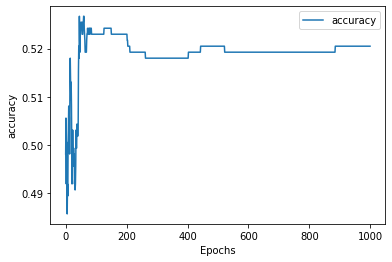

In [148]:
plot_graphs(history, 'accuracy')